In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [4]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 6.3MB/s 
     |████████████████████████████████| 9.5MB 15.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [5]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/AndhraPradesh1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed
0,2000,1,1,0,0,0,0,0,0,0,0,20,20.736232,937.309814,97.636380,171.103614,1.820233
1,2000,1,1,1,0,0,0,0,0,0,0,20,20.547621,936.590149,97.764840,162.082357,1.616232
2,2000,1,1,2,0,0,0,0,0,0,0,20,20.405927,936.324219,98.032320,148.957279,1.382257
3,2000,1,1,3,0,0,0,0,0,0,0,20,20.305098,936.155273,98.152521,135.256602,1.173256
4,2000,1,1,4,0,0,0,0,0,0,0,19,20.266761,936.478088,98.132011,121.461475,0.998815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,0,16,21.978556,936.352661,71.490068,110.560279,3.608265
131396,2014,12,31,20,0,0,0,0,0,0,0,16,21.479383,936.720520,75.049659,124.306187,3.618451
131397,2014,12,31,21,0,0,0,0,0,0,0,17,20.939624,936.738586,79.410245,138.093203,3.455779
131398,2014,12,31,22,0,0,0,0,0,0,0,17,20.557559,936.552063,83.143147,151.731824,3.287697


In [6]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed,Date
0,2000,1,1,0,0,0,0,0,0,0,0,20,20.736232,937.309814,97.636380,171.103614,1.820233,2000-01-01 00:00:00
1,2000,1,1,1,0,0,0,0,0,0,0,20,20.547621,936.590149,97.764840,162.082357,1.616232,2000-01-01 01:00:00
2,2000,1,1,2,0,0,0,0,0,0,0,20,20.405927,936.324219,98.032320,148.957279,1.382257,2000-01-01 02:00:00
3,2000,1,1,3,0,0,0,0,0,0,0,20,20.305098,936.155273,98.152521,135.256602,1.173256,2000-01-01 03:00:00
4,2000,1,1,4,0,0,0,0,0,0,0,19,20.266761,936.478088,98.132011,121.461475,0.998815,2000-01-01 04:00:00
5,2000,1,1,5,0,0,0,0,0,0,0,13,13.790353,939.899292,98.876405,107.660610,2.971705,2000-01-01 05:00:00
6,2000,1,1,6,0,0,0,0,0,0,0,13,14.254964,940.688599,93.838127,94.123193,2.779415,2000-01-01 06:00:00
7,2000,1,1,7,0,59,316,109,59,316,109,13,15.892355,941.445618,86.837310,80.913256,2.547579,2000-01-01 07:00:00
8,2000,1,1,8,0,110,602,333,110,602,333,14,18.137191,942.006470,80.201618,68.258226,2.482057,2000-01-01 08:00:00
9,2000,1,1,9,0,138,740,547,138,740,547,14,21.422234,941.736328,66.567218,56.554706,2.902531,2000-01-01 09:00:00


In [7]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [8]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,549.9
2000-01-02,558.1
2000-01-03,507.1
2000-01-04,554.1
2000-01-05,554.7
...,...
2014-12-27,526.6
2014-12-28,370.0
2014-12-29,480.1


In [9]:
y_w=y.resample('W-FRI').mean()
y_w

,GHI
Date,
2000-01-07,549.028571
2000-01-14,550.128571
2000-01-21,582.828571
2000-01-28,599.742857
2000-02-04,634.742857
...,...
2014-12-05,526.657143
2014-12-12,462.814286
2014-12-19,420.957143


In [10]:
y_w[:'2011']

,GHI
Date,
2000-01-07,549.028571
2000-01-14,550.128571
2000-01-21,582.828571
2000-01-28,599.742857
2000-02-04,634.742857
...,...
2011-12-02,396.328571
2011-12-09,494.057143
2011-12-16,503.985714


In [11]:
y[:4382]

,GHI
Date,
2000-01-01,549.9
2000-01-02,558.1
2000-01-03,507.1
2000-01-04,554.1
2000-01-05,554.7
...,...
2011-12-29,523.8
2011-12-30,190.1
2011-12-31,356.7


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
type(y)

pandas.core.frame.DataFrame

In [14]:
X_T=[]
y=y.loc[:,'GHI']
y=y.values
for i in range(0,5474,7):
  X_add = y[i:i+7]
  X_T.append(X_add)
X_T=np.asarray(X_T)
X_T.shape

(782, 7)

In [15]:
Y_T=y_w.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(783,)

In [16]:
type(X_T[:626])

numpy.ndarray

In [17]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=7))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_T[:626], Y_T[:626], epochs=2000, verbose=0)

In [18]:
# demonstrate prediction
yhat=[]

for i in range(626,782):
  x_input = X_T[i]
  x_input = x_input.reshape((1, 7))
  yRez = model.predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[540.29205]]
[[516.7187]]
[[598.69446]]
[[598.8668]]
[[611.57886]]
[[598.7969]]
[[635.22034]]
[[665.0678]]
[[666.1499]]
[[671.0528]]
[[660.6317]]
[[689.3343]]
[[699.29767]]
[[684.70337]]
[[658.50714]]
[[656.1165]]
[[586.77203]]
[[675.8424]]
[[630.3282]]
[[618.8525]]
[[581.0352]]
[[651.1356]]
[[629.79376]]
[[583.78]]
[[595.9744]]
[[542.4882]]
[[574.4836]]
[[598.05176]]
[[490.02145]]
[[558.31824]]
[[535.38995]]
[[567.30634]]
[[633.7303]]
[[560.83344]]
[[555.3995]]
[[536.52734]]
[[622.9534]]
[[621.6194]]
[[564.9026]]
[[583.02]]
[[624.6571]]
[[492.49274]]
[[562.071]]
[[350.32578]]
[[552.469]]
[[567.92554]]
[[460.66226]]
[[525.847]]
[[482.774]]
[[523.72815]]
[[526.7167]]
[[425.51123]]
[[545.0831]]
[[571.3065]]
[[586.1284]]
[[602.34406]]
[[609.21533]]
[[556.2108]]
[[533.2902]]
[[667.8785]]
[[679.1989]]
[[587.9814]]
[[688.7484]]
[[667.0381]]
[[691.0223]]
[[681.8147]]
[[697.8907]]
[[700.30597]]
[[640.92035]]
[[662.21686]]
[[659.8873]]
[[633.8411]]
[[657.6677]]
[[579.262]]
[[588.9587]]
[[532.3

[array([[540.29205]], dtype=float32),
 array([[516.7187]], dtype=float32),
 array([[598.69446]], dtype=float32),
 array([[598.8668]], dtype=float32),
 array([[611.57886]], dtype=float32),
 array([[598.7969]], dtype=float32),
 array([[635.22034]], dtype=float32),
 array([[665.0678]], dtype=float32),
 array([[666.1499]], dtype=float32),
 array([[671.0528]], dtype=float32),
 array([[660.6317]], dtype=float32),
 array([[689.3343]], dtype=float32),
 array([[699.29767]], dtype=float32),
 array([[684.70337]], dtype=float32),
 array([[658.50714]], dtype=float32),
 array([[656.1165]], dtype=float32),
 array([[586.77203]], dtype=float32),
 array([[675.8424]], dtype=float32),
 array([[630.3282]], dtype=float32),
 array([[618.8525]], dtype=float32),
 array([[581.0352]], dtype=float32),
 array([[651.1356]], dtype=float32),
 array([[629.79376]], dtype=float32),
 array([[583.78]], dtype=float32),
 array([[595.9744]], dtype=float32),
 array([[542.4882]], dtype=float32),
 array([[574.4836]], dtype=floa

In [19]:
y_w[626:-2].index

DatetimeIndex(['2012-01-06', '2012-01-13', '2012-01-20', '2012-01-27',
               '2012-02-03', '2012-02-10', '2012-02-17', '2012-02-24',
               '2012-03-02', '2012-03-09',
               ...
               '2014-10-17', '2014-10-24', '2014-10-31', '2014-11-07',
               '2014-11-14', '2014-11-21', '2014-11-28', '2014-12-05',
               '2014-12-12', '2014-12-19'],
              dtype='datetime64[ns]', name='Date', length=155, freq='W-FRI')

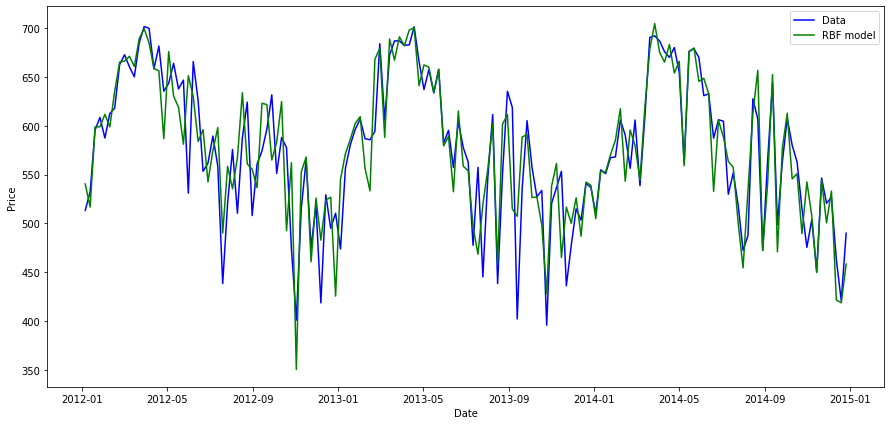

In [20]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Data')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_w[626:-1],np.asarray(yhat).reshape(156,),squared=False))

35.973876469279624


In [22]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_w[626:-1],np.asarray(yhat).reshape(156,)))

0.04781090726091818


In [23]:
X_train = y_w[:'2011']
X_test = y_w['2012':]

In [24]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(X_train, start_p=0, start_q=0,max_p=1,max_d=1,max_q=1, m=52,start_P=0,start_Q=0,max_P=1,max_D=1,max_Q=1, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=6845.410, Time=2.63 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=6590.931, Time=7.96 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=33.46 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=6739.413, Time=0.69 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=62.78 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=38.45 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=6667.134, Time=2.44 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=inf, Time=18.87 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=inf, Time=24.29 sec
 ARIMA(1,1,0)(1,1,0)[52] intercept   : AIC=6592.927, Time=24.38 sec

Best model:  ARIMA(1,1,0)(1,1,0)[52]          
Total fit time: 215.958 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  626
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 52)   Log Likelihood               -3292.466
Date:                            Sun, 02 May 2021   AIC                           6590.931
Time:                                    09:35:22   BIC                           6603.984
Sample:                                         0   HQIC                          6596.023
                                            - 626                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3592      0.033    -10.918      0.000      -0.424      -0.295
ar.S.L52      -0.4967      0.033    -15.151      0.000      -0.561      -0.432
sigma2      5591.1270    295.645     18.912      0.000    5011.674    6170.580
===================================================================================
Ljung-Box (L1) (Q):                   3.88   Jarque-Bera (JB):                13.01
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -0.27
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
stepwise_model.fit(X_train)
pred=stepwise_model.predict(n_periods=156)
pred

array([530.7670354 , 522.86629529, 582.14605417, 592.67916389,
       628.54195762, 628.47901597, 641.81179518, 612.5719829 ,
       668.44058102, 681.8496077 , 675.70304812, 707.68408977,
       691.49529958, 697.38271877, 688.71199461, 669.82967955,
       668.18469941, 678.57839288, 681.36597054, 585.28173993,
       675.83551703, 657.33119253, 612.93998212, 544.85482422,
       611.88430286, 572.73227788, 552.50091652, 578.75256991,
       498.01008569, 540.98816138, 547.86885884, 626.63337588,
       544.23312012, 523.9868859 , 480.5607408 , 555.37950972,
       577.13344019, 597.9904973 , 628.25924445, 544.20236468,
       566.72067492, 532.30055971, 494.57046503, 395.82364433,
       514.61526388, 516.94241724, 522.25185349, 426.98540286,
       468.62462184, 474.82052634, 523.45550177, 514.87377115,
       523.78714155, 562.55929831, 598.80734469, 613.2198898 ,
       637.93864632, 647.00445907, 648.88167961, 602.55240433,
       678.57597133, 693.27914154, 698.1904954 , 714.67

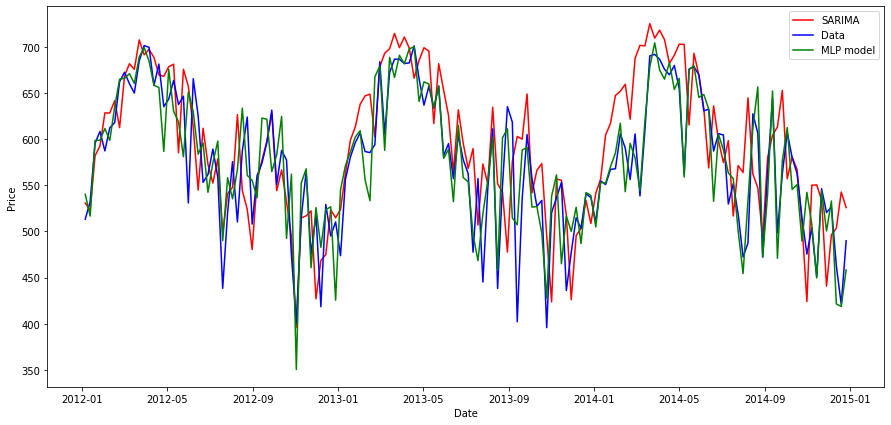

In [26]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, pred, color= 'red', label= 'SARIMA')
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Data')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'MLP model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

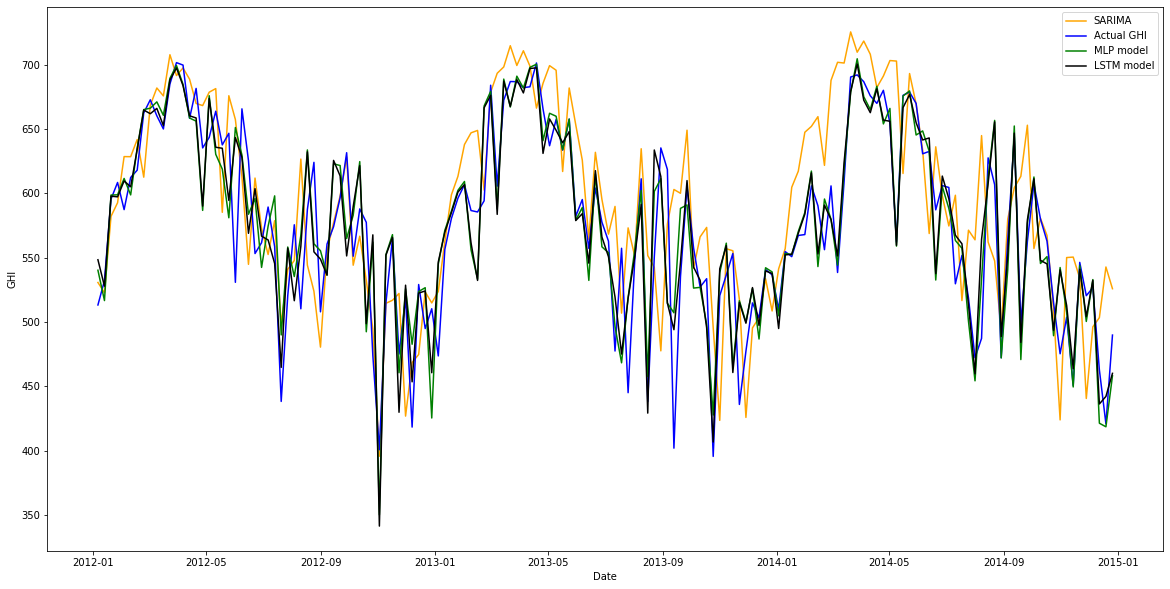

In [27]:
LSTM = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/AndhraPradesh1/LSTMweekly.csv')
plt.figure(figsize = (20,10))
plt.plot(y_w[626:-1].index, pred, color= 'orange', label= 'SARIMA')
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Actual GHI')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'MLP model') 
plt.plot(y_w[626:-1].index, LSTM['GHI'], color= 'black', label= 'LSTM model')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.show()

In [ ]:
hybrid=pd.DataFrame(columns=['Values','Model'])
for i in range (156):
  if abs(yhat[i]-y_w.iloc[626+i]['GHI'])<abs(pred[i]-y_w.iloc[626+i]['GHI']):
    hybrid.loc[i]=[yhat[i][0][0],-1]
  else:
    hybrid.loc[i]=[pred[i],1]
hybrid

,Values,Model
0,404.921631,-1.0
1,408.134766,-1.0
2,440.279755,-1.0
3,419.800842,-1.0
4,466.565338,-1.0
...,...,...
151,416.137433,1.0
152,419.658750,1.0
153,407.626173,1.0
154,384.680084,-1.0


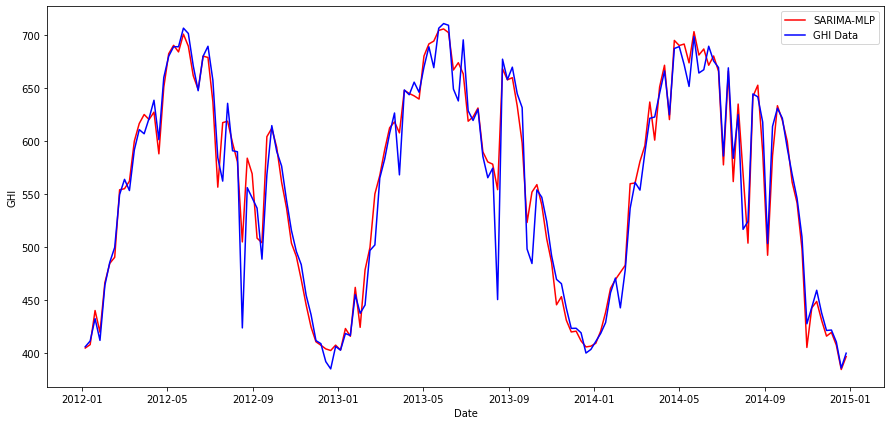

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, hybrid['Values'], color= 'red', label= 'SARIMA-MLP')
#plt.scatter(y_w[626:678].index, hybrid['Model'][:52], color= 'red', label= 'hybrid1',marker='+')
#plt.scatter(y_w[626:678].index, hybrid['Model'][52:104], color= 'blue', label= 'hybrid2',marker='|',s=hybrid['Model'][52:104]*50)
#plt.scatter(y_w[626:678].index, hybrid['Model'][104:156], color= 'green', label= 'hybrid3',marker='_')
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'GHI Data')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_w[626:-1],np.asarray(yhat).reshape(156,),squared=False))
print(mean_squared_error(y_w[626:-1],pred,squared=False))
print(mean_squared_error(y_w[626:-1],hybrid['Values'],squared=False))

25.39219586498465
42.802802883716346
19.25658433579076


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_w[626:-1],np.asarray(yhat).reshape(156,)))
print(mean_absolute_percentage_error(y_w[626:-1],pred))
print(mean_absolute_percentage_error(y_w[626:-1],hybrid['Values']))

0.03014831859567477
0.05520757061969331
0.023162253629123015
